# Necessary imports and globals

In [1]:
%matplotlib notebook

import numpy as np
import os
from dopamine.agents.dqn import dqn_agent
from dopamine.discrete_domains import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags

BASE_PATH = './'  # @param
#GAMES = ['cars']  # @param
GAMES = ['breakout']  # @param

import matplotlib.pyplot as plt


# Episode Rerurns

<IPython.core.display.Javascript object>


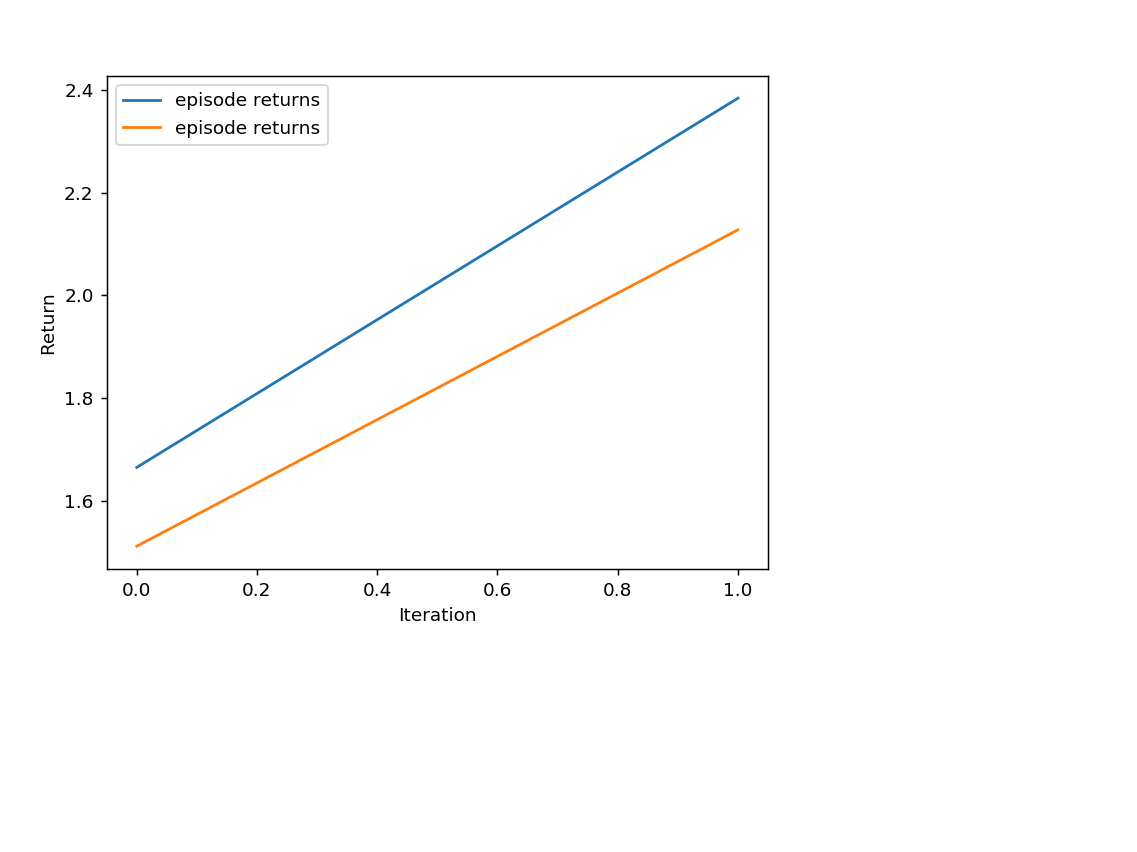

In [4]:
NUM_OF_PARALLEL_RUNS = 2
for game in GAMES:
    # Use our provided colab utils to load this log file. The second returned 
  
    #raw_data, _ = colab_utils.load_statistics(
    #    'LOGS/logs'.format(game), verbose=False)
    for i in range(1 ,NUM_OF_PARALLEL_RUNS+1):
        
         #raw_data, _ = colab_utils.load_statistics('./LOGS_ARCHIVE/dqn-brekout-original-gin/LOGS{:d}/logs'.format(i), verbose=False)

        
        raw_data, _ = colab_utils.load_statistics('./LOGS{:d}/logs'.format(i), verbose=False)




                                 #'LOGS/logs'.format(game), verbose=False)
            #'LOGS/logs'.format(game), verbose=False)
            #'LOGS_ARCHIVE/logs for hierarchy on breakout/LOGS_6/logs'.format(game), verbose=False)
                                 #'LOGS/logs'.format(game), verbose=False)
        summarized_data = colab_utils.summarize_data(
                                     raw_data, ['train_episode_returns'])
        plt.plot(summarized_data['train_episode_returns'], label='episode returns')

        plt.xlabel('Iteration')
        plt.ylabel('Return')
        plt.legend()
    
    plt.show()

# Show Specific Statistics For Hierarchical Agent

#average return of each agent

In [3]:
    #  train_episode_dqn_utilization

    N = 2
    run_mode_str = "train"
    for i in range(1, NUM_OF_PARALLEL_RUNS + 1):
        plt.figure()
        raw_data, _ = colab_utils.load_statistics('./LOGS{:d}/logs'.format(i), verbose=False)
        for i in range (N):

            name_of_data = '{}_agent_{:d}_average_episode_returns'.format(run_mode_str,i)
            summarized_data_two = colab_utils.summarize_data( raw_data, [name_of_data])

            plt.plot( summarized_data_two[name_of_data], label=name_of_data )
            print(summarized_data_two[name_of_data])

        plt.xlabel('Iteration')
        plt.ylabel('Average episode returns')

        plt.legend()
        plt.show()

<IPython.core.display.Javascript object>

[0.06989660584068727, 0.07166043443535645, 0.08664283305596886]
[0.07119190837883198, 0.07168036260221763, 0.0869124292760918]


### Utilization precentage of each agent over one phase:

In [4]:
    #  train_episode_dqn_utilization
    N = 5
    plt.figure()
    
    for i in range (N):
        
        name_of_data = 'train_episode_dqn_utilization_' + str(i)
        summarized_data_two = colab_utils.summarize_data( raw_data, [name_of_data])

        plt.plot( summarized_data_two[name_of_data], label=name_of_data )
    
    plt.xlabel('Iteration')
    plt.ylabel('Utilization Presentage')
    
    plt.legend()
    plt.show()
   

<IPython.core.display.Javascript object>

KeyError: 'train_episode_dqn_utilization_2'

### Action distribution of all sub agents

In [ ]:

#show hist
A = 5
for agent in range( N ):
    plt.figure()
    for action in range( A ):
#             if agent != 0 or action < N:
        name_of_data = '{}_agent_{:d}action_{:d}_hist'.format( "train", agent, action )
        summarized_data_two = colab_utils.summarize_data( raw_data, [name_of_data])
        plt.plot( summarized_data_two[name_of_data], label=name_of_data )

    plt.xlabel('Iteration')
    plt.ylabel('Utilization Presentage')

    plt.legend()
    plt.title('agent_{:d}'.format(agent))
    plt.show()

#     for i in range (N):
#         plt.figure()
        
        
    
#         plt.plot( tmp_hist, label=name_of_data )
    
#     plt.xlabel('Iteration')
#     plt.ylabel('Utilization Presentage')
    
#     plt.legend()
#     plt.show()